## Text Mining em documentos de Defesa Norte Americanos

##### Objetivo:
* Ver a quantidade de vezes que palavras relacionadas com cyber security aparecem aparecem conforme passam os anos.

##### Procedimento:
1. Ler cada documento deixando claro a que ano se refere
2. Remover pontuações e stopwords (lembrando de adicionar palavras como us, united, states)
3. Realizar a contagem de palavras
4. Plotar a evolução histórica dessa contagem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from PyPDF2 import PdfFileReader
from bs4 import BeautifulSoup
import re
import string
import glob
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

%matplotlib inline

Criando função que lerá documentos

#### Em primeiro momento, será feita uma análise geral levando em conta todos os documentos de uma só vez. Após isso, será analisado cada documento separadamente

In [3]:
def ler_(arquivo): #Essa versão é a que está valendo
    pdf = open(arquivo, "rb")
    reader = PdfFileReader(pdf)
    tamanho = reader.numPages
    
    pages = []
    
    for i in range(tamanho):
        pages.append(reader.getPage(i).extractText())
        
    text = " ".join(pages)
    
    return text

In [4]:
textos = os.listdir('textos')

In [5]:
textos[0][:4]

'2006'

Lendo documentos e armazenando por ano num DataFrame

In [6]:
ano = []
text = []
for texto in textos:
    ano.append(texto[:4])
    text.append(ler_('textos/'+texto))

In [7]:
df = pd.DataFrame(text, columns=['text'], index=ano)

In [8]:
df.head()

text
2006        Annual Threat Assessment of the Director...
2007    \n Annual Threat Assessment \nof the \nDirec...
2008       Annual Threat Assessment of the   Intelli...
2009       Annual Threat Assessment of the   Intelli...
2010      Annual Threat Assessment of the   US Intel...

A arquivo do ano de 2011 é um pdf scaneado!

In [9]:
nltk.download('stopwords')
stop = stopwords.words('english')
#punctuation = list(string.punctuation)
#stop.update(punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\galag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#Adicionando algumas palavras que se percebeu ser comum nos arquivos e que não somam muito no objetivo
stop.append('us')
stop.append('united')
stop.append('states')
stop.append('also')

#### Tirando caracteres especiais

In [11]:
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_br = lambda x: re.sub(r""" br """, ' ', x.lower())
remove_n = lambda x: re.sub(r""" [\r\n]+ """, ' ', x.lower())
line = lambda x: x.strip()
linen =  lambda x: re.sub("\n","",x)


df['text_b'] = df.text.map(alphanumeric).map(punc_lower).map(remove_br).map(remove_n).map(line).map(linen)
df['text_b'] = df['text_b'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))



In [12]:
df

text  \
2006        Annual Threat Assessment of the Director...   
2007    \n Annual Threat Assessment \nof the \nDirec...   
2008       Annual Threat Assessment of the   Intelli...   
2009       Annual Threat Assessment of the   Intelli...   
2010      Annual Threat Assessment of the   US Intel...   
2011                                                      
2012   \n \n \n \n \nUnclassified Statement for the ...   
2013     Statement for the Record  \n Worldwide Thre...   
2014   \n \n \nStatement for the Record \n \n \nWorl...   
2015   \n \nStatement for the Record \n \n \nWorldwi...   
2016   \nStatement for the Record \n \n \nWorldwide ...   
2017   \n \nStatement for the Record \n \n \nWorldwi...   
2018   \n1\n \n \n \n6 March 2018\n \n \n \n  \n2\n ...   
2019     29 JANUARY\n 2019 Senate Select Committee o...   

                                                 text_b  
2006  annual threat assessment of the director of na...  
2007  annual threat assessment of the director of na...  
2008  annual threat assessment of the   intelligence...  
2009  annual threat assessment of the   intelligence...  
2010  annual threat assessment of the   us intellige...  
2011                                                     
2012  unclassified statement for the record on the  ...  
2013  statement for the record  worldwide threat ass...  
2014  statement for the record  worldwide threat ass...  
2015  statement for the record  worldwide threat ass...  
2016  statement for the record  worldwide threat ass...  
2017  statement for the record  worldwide threat ass...  
2018  march      statement for the record  worldwide...  
2019  january   senate select committee on intellige...

Criando função que vai contabilizar as palavras no conjunto de arquivos

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, g):
    vec = CountVectorizer(ngram_range=(g, g), stop_words=stop).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [14]:
most_common_uni = get_top_text_ngrams(df.text_b,1)
most_common_uni = dict(most_common_uni)

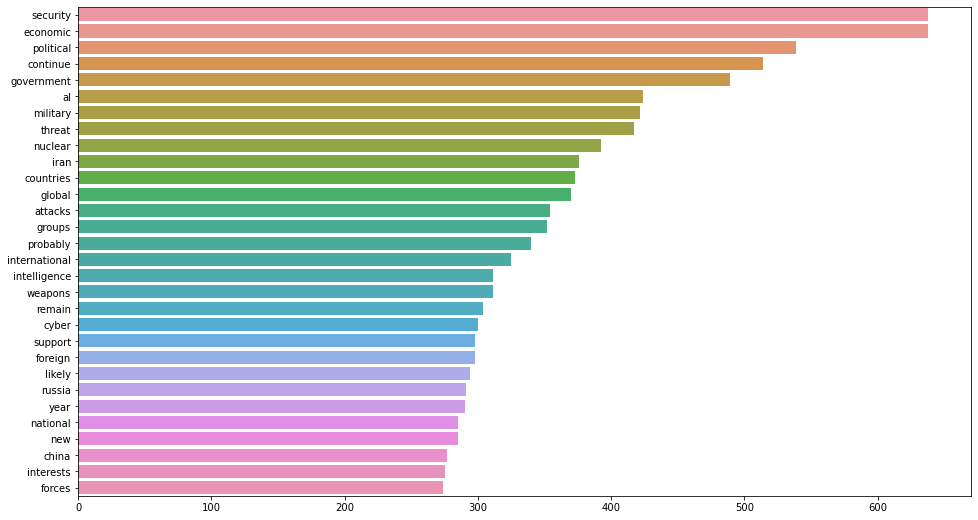

In [15]:
plt.figure(figsize = (16,9))
sns.barplot(x=list(most_common_uni.values())[:30],y=list(most_common_uni.keys())[:30])
plt.show()

In [16]:
most_common_uni

{'security': 638,
 'economic': 638,
 'political': 539,
 'continue': 514,
 'government': 489,
 'al': 424,
 'military': 422,
 'threat': 417,
 'nuclear': 392,
 'iran': 376,
 'countries': 373,
 'global': 370,
 'attacks': 354,
 'groups': 352,
 'probably': 340,
 'international': 325,
 'intelligence': 311,
 'weapons': 311,
 'remain': 304,
 'cyber': 300,
 'support': 298,
 'foreign': 298,
 'likely': 294,
 'russia': 291,
 'year': 290,
 'national': 285,
 'new': 285,
 'china': 277,
 'interests': 275,
 'forces': 274,
 'north': 269,
 'capabilities': 259,
 'efforts': 256,
 'terrorist': 247,
 'regional': 246,
 'iraq': 245,
 'state': 244,
 'including': 244,
 'region': 244,
 'oil': 243,
 'influence': 238,
 'assess': 234,
 'threats': 231,
 'use': 224,
 'leaders': 222,
 'since': 219,
 'could': 219,
 'syria': 217,
 'operations': 216,
 'however': 211,
 'growth': 206,
 'years': 204,
 'power': 202,
 'qaida': 201,
 'violence': 201,
 'many': 196,
 'president': 195,
 'conflict': 190,
 'record': 190,
 'statement'

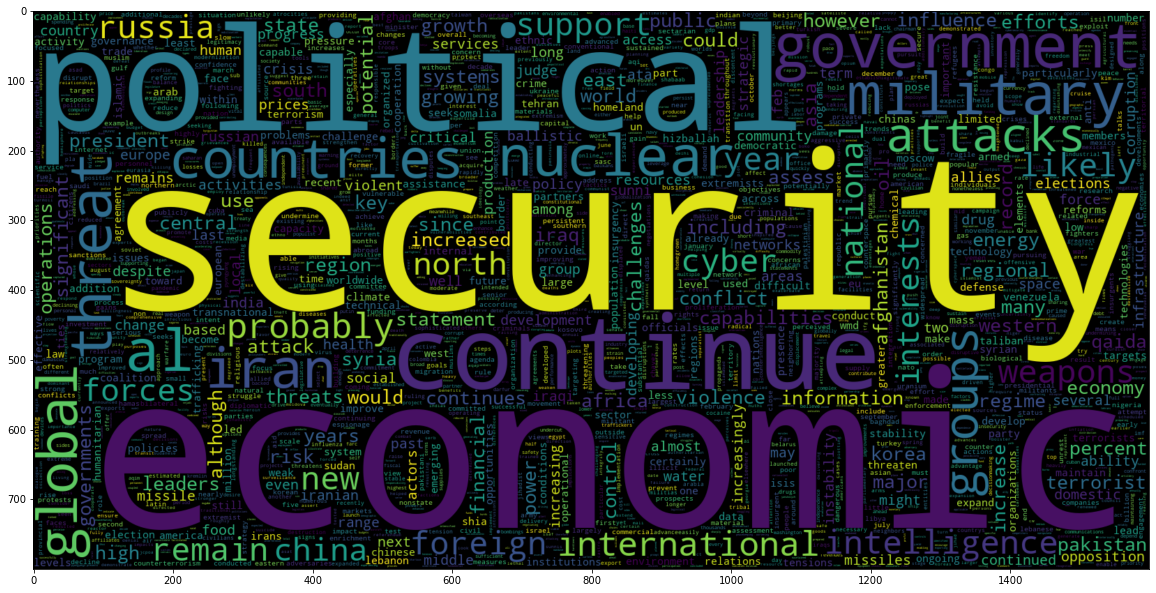

In [37]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).fit_words(most_common_uni)
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig('worldAll1', dpi=600)
plt.show()

In [18]:
tudo = pd.DataFrame(data = most_common_uni.values(), index = most_common_uni.keys(), columns = ['quantidade'])

#### Quantidade total de palavras

In [19]:
tudo.quantidade.sum()

104434

In [20]:
tudo.quantidade 

security              638
economic              638
political             539
continue              514
government            489
                     ... 
ivan                    1
fraying                 1
miguel                  1
institutionalizing      1
canel                   1
Name: quantidade, Length: 10581, dtype: int64

In [21]:
(tudo.quantidade / tudo.quantidade.sum())*100

security              0.610912
economic              0.610912
political             0.516115
continue              0.492177
government            0.468238
                        ...   
ivan                  0.000958
fraying               0.000958
miguel                0.000958
institutionalizing    0.000958
canel                 0.000958
Name: quantidade, Length: 10581, dtype: float64

In [22]:
most_common_bi = get_top_text_ngrams(df.text_b,2)
most_common_bi = dict(most_common_uni)

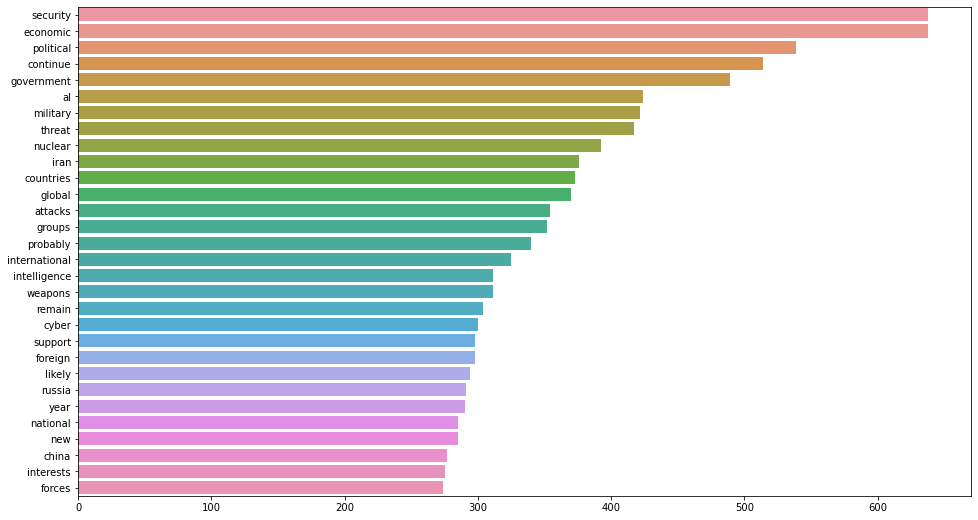

In [23]:
plt.figure(figsize = (16,9))
sns.barplot(x=list(most_common_bi.values())[:30],y=list(most_common_bi.keys())[:30])
plt.show()

In [24]:
most_common_bi

{'security': 638,
 'economic': 638,
 'political': 539,
 'continue': 514,
 'government': 489,
 'al': 424,
 'military': 422,
 'threat': 417,
 'nuclear': 392,
 'iran': 376,
 'countries': 373,
 'global': 370,
 'attacks': 354,
 'groups': 352,
 'probably': 340,
 'international': 325,
 'intelligence': 311,
 'weapons': 311,
 'remain': 304,
 'cyber': 300,
 'support': 298,
 'foreign': 298,
 'likely': 294,
 'russia': 291,
 'year': 290,
 'national': 285,
 'new': 285,
 'china': 277,
 'interests': 275,
 'forces': 274,
 'north': 269,
 'capabilities': 259,
 'efforts': 256,
 'terrorist': 247,
 'regional': 246,
 'iraq': 245,
 'state': 244,
 'including': 244,
 'region': 244,
 'oil': 243,
 'influence': 238,
 'assess': 234,
 'threats': 231,
 'use': 224,
 'leaders': 222,
 'since': 219,
 'could': 219,
 'syria': 217,
 'operations': 216,
 'however': 211,
 'growth': 206,
 'years': 204,
 'power': 202,
 'qaida': 201,
 'violence': 201,
 'many': 196,
 'president': 195,
 'conflict': 190,
 'record': 190,
 'statement'

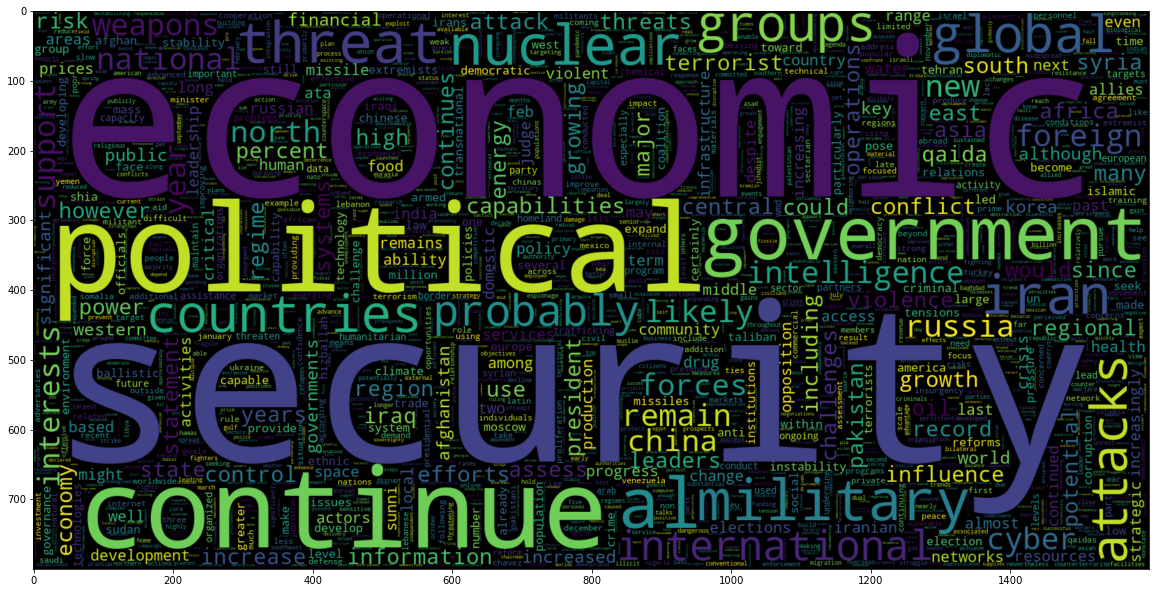

In [38]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).fit_words(most_common_bi)
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig('worldAll2', dpi=600)
plt.show()

In [26]:
#Para fazer tokenização

df['token'] = df.text_b.map(word_tokenize)

In [27]:
df

text  \
2006        Annual Threat Assessment of the Director...   
2007    \n Annual Threat Assessment \nof the \nDirec...   
2008       Annual Threat Assessment of the   Intelli...   
2009       Annual Threat Assessment of the   Intelli...   
2010      Annual Threat Assessment of the   US Intel...   
2011                                                      
2012   \n \n \n \n \nUnclassified Statement for the ...   
2013     Statement for the Record  \n Worldwide Thre...   
2014   \n \n \nStatement for the Record \n \n \nWorl...   
2015   \n \nStatement for the Record \n \n \nWorldwi...   
2016   \nStatement for the Record \n \n \nWorldwide ...   
2017   \n \nStatement for the Record \n \n \nWorldwi...   
2018   \n1\n \n \n \n6 March 2018\n \n \n \n  \n2\n ...   
2019     29 JANUARY\n 2019 Senate Select Committee o...   

                                                 text_b  \
2006  annual threat assessment of the director of na...   
2007  annual threat assessment of the director of na...   
2008  annual threat assessment of the   intelligence...   
2009  annual threat assessment of the   intelligence...   
2010  annual threat assessment of the   us intellige...   
2011                                                      
2012  unclassified statement for the record on the  ...   
2013  statement for the record  worldwide threat ass...   
2014  statement for the record  worldwide threat ass...   
2015  statement for the record  worldwide threat ass...   
2016  statement for the record  worldwide threat ass...   
2017  statement for the record  worldwide threat ass...   
2018  march      statement for the record  worldwide...   
2019  january   senate select committee on intellige...   

                                                  token  
2006  [annual, threat, assessment, of, the, director...  
2007  [annual, threat, assessment, of, the, director...  
2008  [annual, threat, assessment, of, the, intellig...  
2009  [annual, threat, assessment, of, the, intellig...  
2010  [annual, threat, assessment, of, the, us, inte...  
2011                                                 []  
2012  [unclassified, statement, for, the, record, on...  
2013  [statement, for, the, record, worldwide, threa...  
2014  [statement, for, the, record, worldwide, threa...  
2015  [statement, for, the, record, worldwide, threa...  
2016  [statement, for, the, record, worldwide, threa...  
2017  [statement, for, the, record, worldwide, threa...  
2018  [march, statement, for, the, record, worldwide...  
2019  [january, senate, select, committee, on, intel...

In [28]:
stop_lambda = lambda x: [y for y in x if y not in stop]
#aplica a função na coluna dos tokens
df['tokens_stop'] = df.token.apply(stop_lambda)
df.head()

text  \
2006        Annual Threat Assessment of the Director...   
2007    \n Annual Threat Assessment \nof the \nDirec...   
2008       Annual Threat Assessment of the   Intelli...   
2009       Annual Threat Assessment of the   Intelli...   
2010      Annual Threat Assessment of the   US Intel...   

                                                 text_b  \
2006  annual threat assessment of the director of na...   
2007  annual threat assessment of the director of na...   
2008  annual threat assessment of the   intelligence...   
2009  annual threat assessment of the   intelligence...   
2010  annual threat assessment of the   us intellige...   

                                                  token  \
2006  [annual, threat, assessment, of, the, director...   
2007  [annual, threat, assessment, of, the, director...   
2008  [annual, threat, assessment, of, the, intellig...   
2009  [annual, threat, assessment, of, the, intellig...   
2010  [annual, threat, assessment, of, the, us, inte...   

                                            tokens_stop  
2006  [annual, threat, assessment, director, nationa...  
2007  [annual, threat, assessment, director, nationa...  
2008  [annual, threat, assessment, intelligence, com...  
2009  [annual, threat, assessment, intelligence, com...  
2010  [annual, threat, assessment, intelligence, com...

### Adiciona Bi-Grams ede todas as linhas

In [29]:
di = {}

for x in df.index:
    g = []
    for gram in ngrams(df['tokens_stop'][x],2): 
        g.append(' '.join(gram))
    di[x] = g

In [30]:
df['bi_gram'] = di.values()

In [31]:
df.head()

text  \
2006        Annual Threat Assessment of the Director...   
2007    \n Annual Threat Assessment \nof the \nDirec...   
2008       Annual Threat Assessment of the   Intelli...   
2009       Annual Threat Assessment of the   Intelli...   
2010      Annual Threat Assessment of the   US Intel...   

                                                 text_b  \
2006  annual threat assessment of the director of na...   
2007  annual threat assessment of the director of na...   
2008  annual threat assessment of the   intelligence...   
2009  annual threat assessment of the   intelligence...   
2010  annual threat assessment of the   us intellige...   

                                                  token  \
2006  [annual, threat, assessment, of, the, director...   
2007  [annual, threat, assessment, of, the, director...   
2008  [annual, threat, assessment, of, the, intellig...   
2009  [annual, threat, assessment, of, the, intellig...   
2010  [annual, threat, assessment, of, the, us, inte...   

                                            tokens_stop  \
2006  [annual, threat, assessment, director, nationa...   
2007  [annual, threat, assessment, director, nationa...   
2008  [annual, threat, assessment, intelligence, com...   
2009  [annual, threat, assessment, intelligence, com...   
2010  [annual, threat, assessment, intelligence, com...   

                                                bi_gram  
2006  [annual threat, threat assessment, assessment ...  
2007  [annual threat, threat assessment, assessment ...  
2008  [annual threat, threat assessment, assessment ...  
2009  [annual threat, threat assessment, assessment ...  
2010  [annual threat, threat assessment, assessment ...

### Adiciona Tri-Grams ede todas as linhas

In [32]:
di = {}

for x in df.index:
    g = []
    for gram in ngrams(df['tokens_stop'][x],3): 
        g.append(' '.join(gram))
    di[x] = g

In [33]:
df['tri_gram'] = di.values()

In [34]:
df.head()

text  \
2006        Annual Threat Assessment of the Director...   
2007    \n Annual Threat Assessment \nof the \nDirec...   
2008       Annual Threat Assessment of the   Intelli...   
2009       Annual Threat Assessment of the   Intelli...   
2010      Annual Threat Assessment of the   US Intel...   

                                                 text_b  \
2006  annual threat assessment of the director of na...   
2007  annual threat assessment of the director of na...   
2008  annual threat assessment of the   intelligence...   
2009  annual threat assessment of the   intelligence...   
2010  annual threat assessment of the   us intellige...   

                                                  token  \
2006  [annual, threat, assessment, of, the, director...   
2007  [annual, threat, assessment, of, the, director...   
2008  [annual, threat, assessment, of, the, intellig...   
2009  [annual, threat, assessment, of, the, intellig...   
2010  [annual, threat, assessment, of, the, us, inte...   

                                            tokens_stop  \
2006  [annual, threat, assessment, director, nationa...   
2007  [annual, threat, assessment, director, nationa...   
2008  [annual, threat, assessment, intelligence, com...   
2009  [annual, threat, assessment, intelligence, com...   
2010  [annual, threat, assessment, intelligence, com...   

                                                bi_gram  \
2006  [annual threat, threat assessment, assessment ...   
2007  [annual threat, threat assessment, assessment ...   
2008  [annual threat, threat assessment, assessment ...   
2009  [annual threat, threat assessment, assessment ...   
2010  [annual threat, threat assessment, assessment ...   

                                               tri_gram  
2006  [annual threat assessment, threat assessment d...  
2007  [annual threat assessment, threat assessment d...  
2008  [annual threat assessment, threat assessment i...  
2009  [annual threat assessment, threat assessment i...  
2010  [annual threat assessment, threat assessment i...

Aqui termina os tratamentos anuais.
<br>
------------------------------------
   #### A partir daqui começa a análise de cada ano separadamente

Análises de 1 palavra

In [35]:
def analise_ano_x(df, ano):
    '''
    df -> dataframe onde está o texto tratado
    ano -> STRING com o ano que se deseja analisar. No momento está disponível de 2006 a 2019, com exceção de 2011
    '''
    # Converte a lista em um dicionário com contagem de valores
    word_counts = Counter(df['tokens_stop'][ano])
    b = word_counts
    a = word_counts
    

    # Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
    word_counts = list(zip(word_counts.values(), word_counts.keys()))

    # Classifique a lista por contagem
    word_counts = sorted(word_counts, reverse=True)

    # Imprime as 20 palavras mais comuns
    print(word_counts[:20])
    
    
    #Fazendo relatório
    b = list(zip(b.keys(), b.values()))
    b = sorted(b, reverse=True, key = lambda x: x[1])
    relatorio = pd.DataFrame(data = dict(b).values(), index = dict(b).keys(), columns = ['quantidade'])
    total_de_palavras = relatorio.quantidade.sum()
    porcentagem = relatorio.quantidade / relatorio.quantidade.sum()
    print(relatorio.head())
    print('---------')
    print(porcentagem.head())
    result = pd.concat([relatorio, porcentagem.to_frame('porcentagem')], axis=1, sort=False)
    
    nome = 'wordcloud'+ano+'.png'    
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a) # o 'a' veio de um counter
    plt.figure(figsize=(16,13))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(nome, dpi=600)
    plt.show()
    
    return result

[(38, 'political'), (31, 'intelligence'), (31, 'al'), (30, 'economic'), (24, 'iraq'), (24, 'global'), (23, 'weapons'), (23, 'government'), (22, 'threat'), (22, 'groups'), (21, 'security'), (21, 'iran'), (20, 'new'), (18, 'world'), (18, 'qaida'), (18, 'nuclear'), (18, 'interests'), (17, 'sunni'), (16, 'national'), (16, 'forces')]
              quantidade
political             38
intelligence          31
al                    31
economic              30
global                24
---------
political       0.007652
intelligence    0.006242
al              0.006242
economic        0.006041
global          0.004833
Name: quantidade, dtype: float64


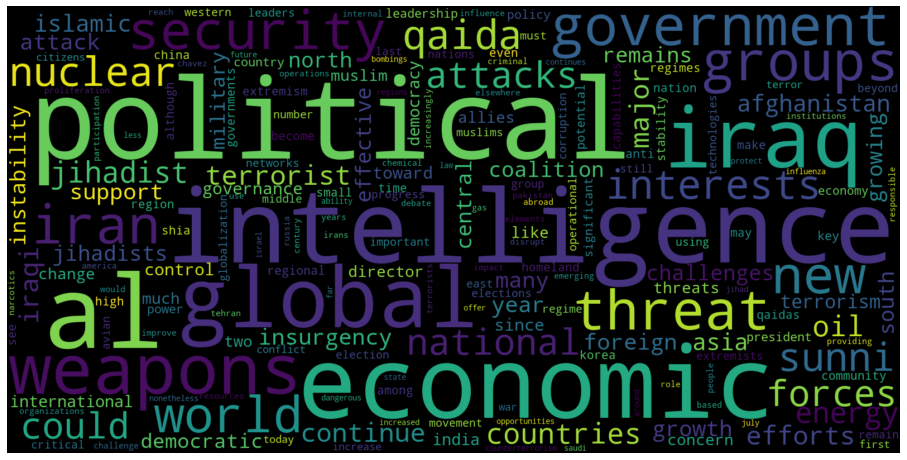

[(24, 'region'), (22, 'security'), (20, 'political'), (20, 'al'), (19, 'national'), (19, 'iraq'), (19, 'government'), (17, 'intelligence'), (16, 'year'), (15, 'power'), (15, 'nuclear'), (15, 'energy'), (15, 'countries'), (14, 'terrorist'), (14, 'major'), (14, 'last'), (13, 'pakistan'), (13, 'economic'), (13, 'continue'), (12, 'threat')]
           quantidade
region             24
security           22
al                 20
political          20
national           19
---------
region       0.006405
security     0.005871
al           0.005338
political    0.005338
national     0.005071
Name: quantidade, dtype: float64


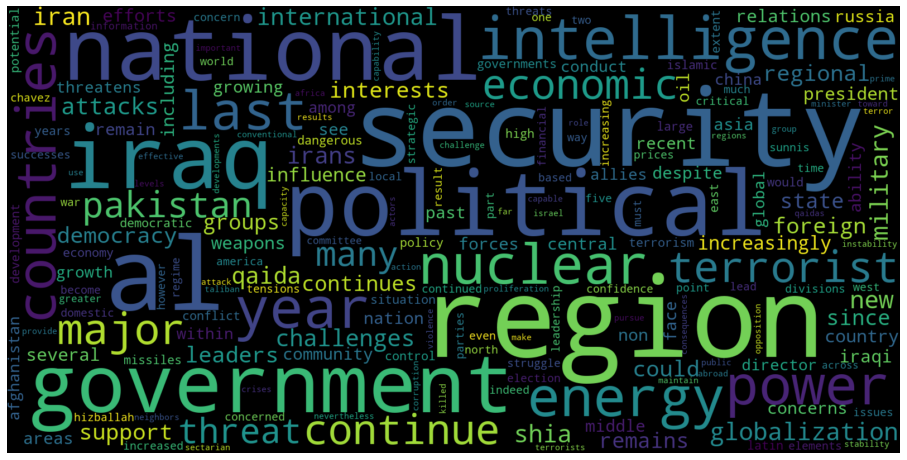

[(74, 'security'), (64, 'al'), (60, 'nuclear'), (55, 'political'), (49, 'statement'), (49, 'record'), (48, 'government'), (45, 'iran'), (45, 'continue'), (44, 'weapons'), (44, 'sasc'), (44, 'feb'), (44, 'ata'), (43, 'qaida'), (40, 'forces'), (39, 'economic'), (37, 'year'), (36, 'threat'), (36, 'iraq'), (35, 'military')]
           quantidade
security           74
al                 64
nuclear            60
political          55
statement          49
---------
security     0.007882
al           0.006816
nuclear      0.006390
political    0.005858
statement    0.005219
Name: quantidade, dtype: float64


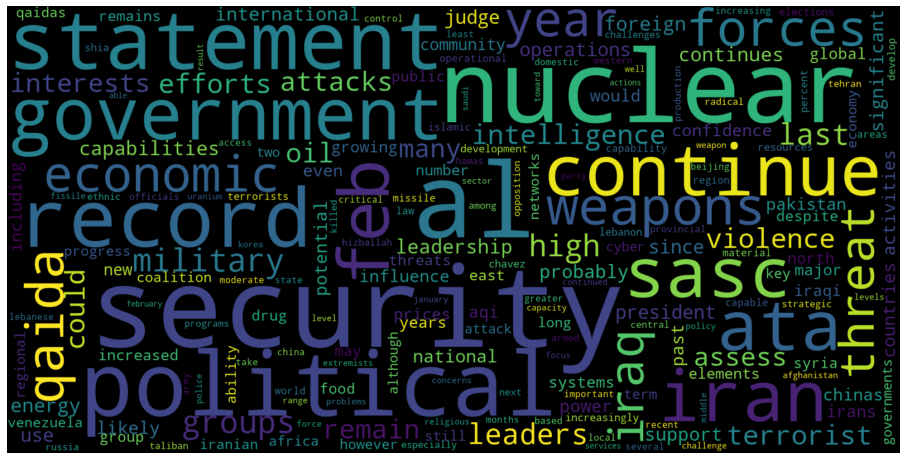

[(99, 'economic'), (78, 'security'), (76, 'al'), (69, 'political'), (66, 'government'), (63, 'nuclear'), (58, 'military'), (54, 'groups'), (53, 'global'), (52, 'record'), (52, 'iran'), (50, 'support'), (50, 'leaders'), (48, 'weapons'), (47, 'statement'), (47, 'countries'), (46, 'qaida'), (45, 'feb'), (45, 'could'), (45, 'attacks')]
            quantidade
economic            99
security            78
al                  76
political           69
government          66
---------
economic      0.007171
security      0.005650
al            0.005505
political     0.004998
government    0.004781
Name: quantidade, dtype: float64


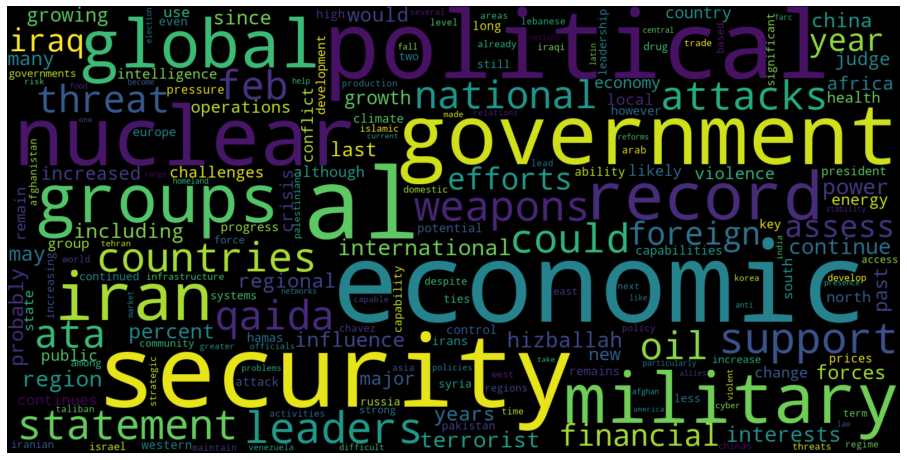

[(93, 'economic'), (83, 'al'), (68, 'government'), (66, 'security'), (65, 'international'), (64, 'political'), (59, 'qaida'), (56, 'statement'), (53, 'continue'), (51, 'record'), (51, 'efforts'), (50, 'groups'), (49, 'year'), (48, 'support'), (48, 'countries'), (47, 'intelligence'), (46, 'nuclear'), (46, 'feb'), (46, 'ata'), (45, 'threat')]
               quantidade
economic               93
al                     83
government             68
security               66
international          65
---------
economic         0.007041
al               0.006284
government       0.005148
security         0.004997
international    0.004921
Name: quantidade, dtype: float64


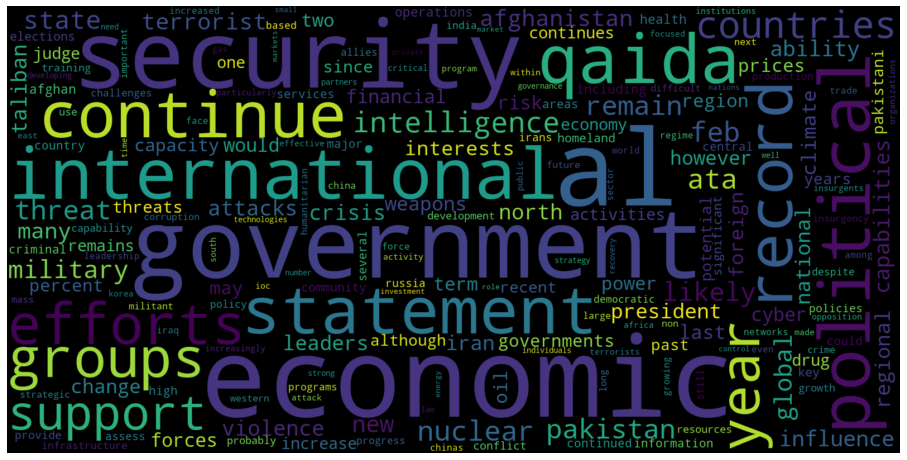

[(50, 'security'), (50, 'al'), (48, 'political'), (39, 'economic'), (37, 'government'), (32, 'nuclear'), (32, 'global'), (29, 'assess'), (27, 'year'), (26, 'water'), (25, 'military'), (25, 'forces'), (24, 'oil'), (24, 'iran'), (24, 'attacks'), (23, 'national'), (23, 'likely'), (23, 'however'), (22, 'threat'), (22, 'percent')]
            quantidade
security            50
al                  50
political           48
economic            39
government          37
---------
security      0.006800
al            0.006800
political     0.006528
economic      0.005304
government    0.005032
Name: quantidade, dtype: float64


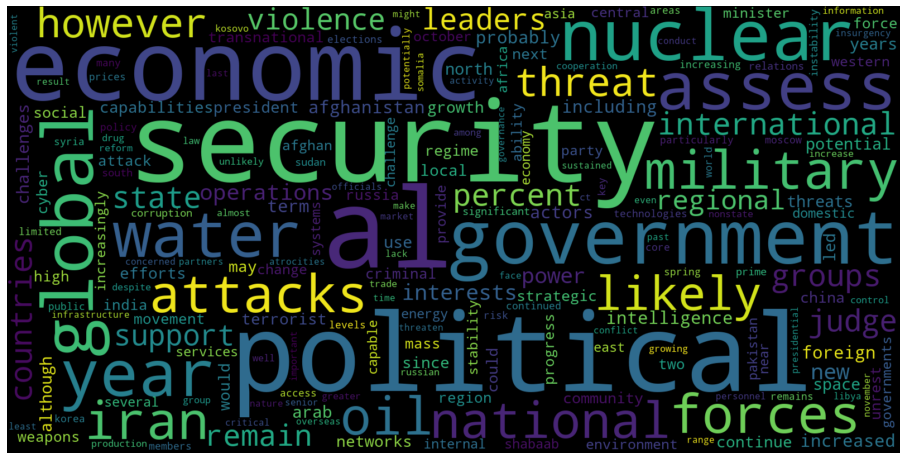

[(58, 'security'), (57, 'economic'), (53, 'political'), (50, 'government'), (47, 'military'), (36, 'foreign'), (33, 'year'), (33, 'north'), (32, 'countries'), (31, 'however'), (31, 'forces'), (30, 'iran'), (29, 'nuclear'), (29, 'national'), (28, 'intelligence'), (28, 'continue'), (28, 'attacks'), (27, 'water'), (27, 'threat'), (27, 'since')]
            quantidade
security            58
economic            57
political           53
government          50
military            47
---------
security      0.006130
economic      0.006024
political     0.005601
government    0.005284
military      0.004967
Name: quantidade, dtype: float64


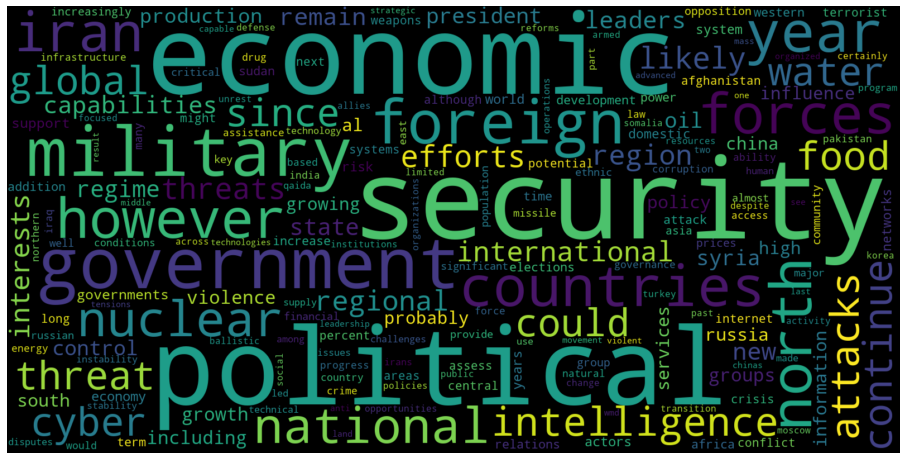

[(52, 'economic'), (51, 'security'), (51, 'continue'), (43, 'government'), (40, 'political'), (35, 'probably'), (31, 'global'), (30, 'military'), (30, 'countries'), (29, 'threat'), (28, 'iran'), (27, 'threats'), (27, 'might'), (27, 'central'), (26, 'new'), (26, 'likely'), (25, 'water'), (25, 'support'), (25, 'north'), (25, 'however')]
            quantidade
economic            52
security            51
continue            51
government          43
political           40
---------
economic      0.006621
security      0.006494
continue      0.006494
government    0.005475
political     0.005093
Name: quantidade, dtype: float64


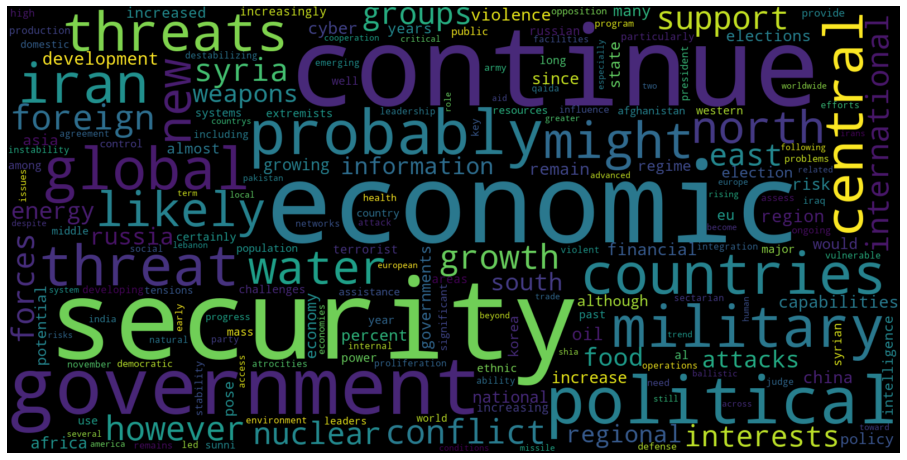

[(51, 'security'), (50, 'probably'), (50, 'economic'), (42, 'cyber'), (31, 'government'), (30, 'international'), (28, 'continue'), (27, 'threat'), (27, 'global'), (26, 'political'), (25, 'forces'), (25, 'countries'), (24, 'russia'), (24, 'north'), (23, 'remain'), (23, 'attacks'), (21, 'state'), (21, 'isil'), (21, 'including'), (21, 'capabilities')]
            quantidade
security            51
economic            50
probably            50
cyber               42
government          31
---------
security      0.008254
economic      0.008092
probably      0.008092
cyber         0.006797
government    0.005017
Name: quantidade, dtype: float64


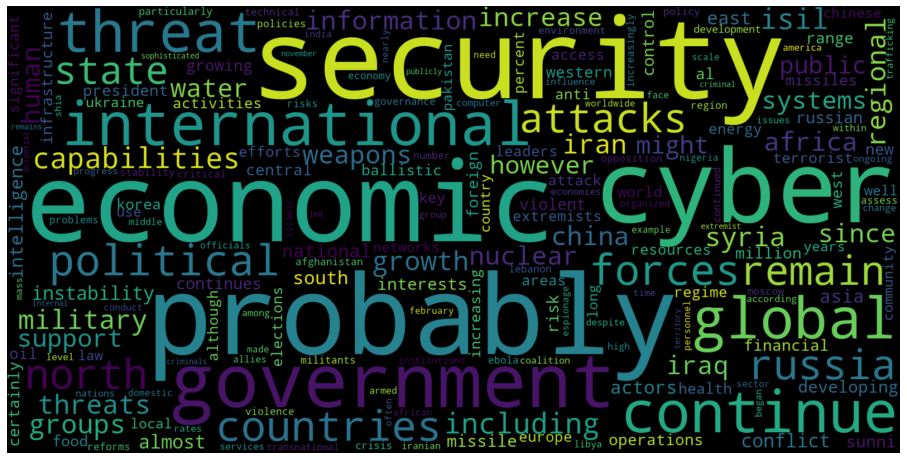

[(60, 'continue'), (54, 'probably'), (48, 'security'), (41, 'threat'), (38, 'political'), (37, 'economic'), (36, 'isil'), (34, 'remain'), (33, 'government'), (32, 'groups'), (31, 'might'), (30, 'russia'), (28, 'military'), (27, 'use'), (27, 'syria'), (27, 'attacks'), (26, 'terrorist'), (26, 'intelligence'), (25, 'countries'), (24, 'systems')]
           quantidade
continue           60
probably           54
security           48
threat             41
political          38
---------
continue     0.007719
probably     0.006947
security     0.006175
threat       0.005275
political    0.004889
Name: quantidade, dtype: float64


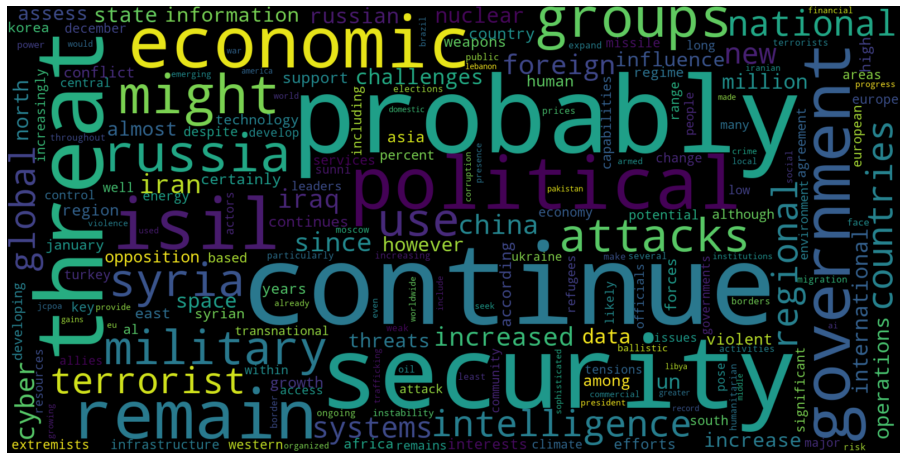

[(70, 'continue'), (54, 'threat'), (44, 'likely'), (43, 'cyber'), (41, 'security'), (40, 'global'), (39, 'military'), (39, 'economic'), (38, 'russia'), (36, 'attacks'), (33, 'countries'), (32, 'support'), (30, 'remain'), (30, 'probably'), (30, 'isis'), (30, 'china'), (29, 'state'), (29, 'capabilities'), (28, 'weapons'), (28, 'syria')]
          quantidade
continue          70
threat            54
likely            44
cyber             43
security          41
---------
continue    0.009560
threat      0.007375
likely      0.006009
cyber       0.005873
security    0.005600
Name: quantidade, dtype: float64


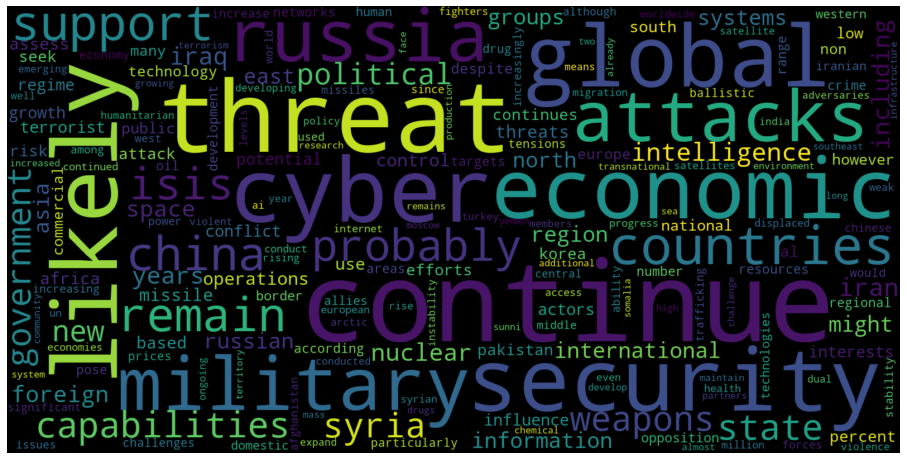

[(57, 'continue'), (39, 'attacks'), (37, 'russia'), (37, 'cyber'), (36, 'likely'), (35, 'probably'), (34, 'security'), (34, 'economic'), (31, 'threat'), (31, 'iran'), (30, 'countries'), (28, 'isis'), (28, 'china'), (27, 'political'), (26, 'use'), (26, 'including'), (25, 'interests'), (24, 'weapons'), (24, 'operations'), (22, 'foreign')]
          quantidade
continue          57
attacks           39
cyber             37
russia            37
likely            36
---------
continue    0.009884
attacks     0.006763
cyber       0.006416
russia      0.006416
likely      0.006242
Name: quantidade, dtype: float64


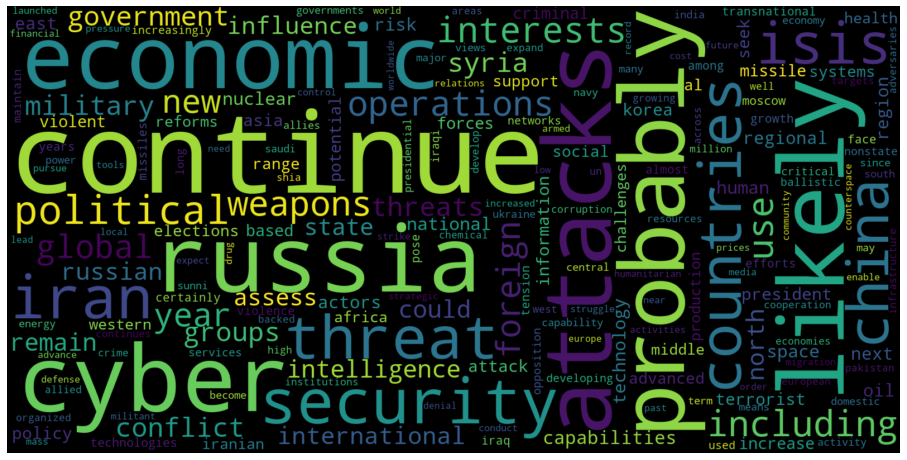

[(59, 'military'), (57, 'china'), (56, 'economic'), (48, 'russia'), (47, 'continue'), (45, 'influence'), (44, 'security'), (43, 'cyber'), (37, 'iran'), (34, 'political'), (33, 'capabilities'), (32, 'likely'), (31, 'use'), (30, 'threat'), (30, 'global'), (30, 'countries'), (30, 'assess'), (29, 'weapons'), (29, 'nuclear'), (28, 'attacks')]
          quantidade
military          59
china             57
economic          56
russia            48
continue          47
---------
military    0.007690
china       0.007430
economic    0.007299
russia      0.006257
continue    0.006126
Name: quantidade, dtype: float64


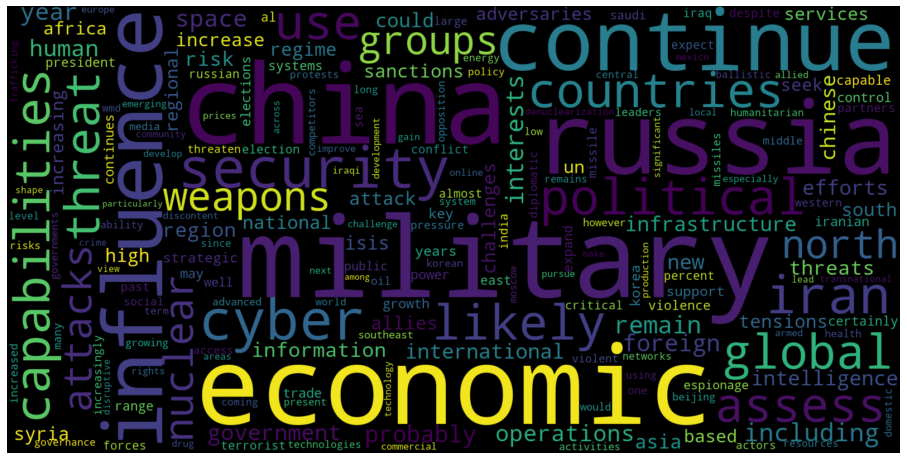

In [39]:
d2006 = analise_ano_x(df, '2006')
d2007 = analise_ano_x(df, '2007')
d2008 = analise_ano_x(df, '2008')
d2009 = analise_ano_x(df, '2009')
d2010 = analise_ano_x(df, '2010')
#d2011 = analise_ano_x(df, '2011')
d2012 = analise_ano_x(df, '2012')
d2013 = analise_ano_x(df, '2013')
d2014 = analise_ano_x(df, '2014')
d2015 = analise_ano_x(df, '2015')
d2016 = analise_ano_x(df, '2016')
d2017 = analise_ano_x(df, '2017')
d2018 = analise_ano_x(df, '2018')
d2019 = analise_ano_x(df, '2019')

Ta ok. Fazer isso por ano e uma linha do tempo

# ATÉ AQUI

In [ ]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text_b,20,1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [28]:
most_common_uni

{'economic': 623,
 'security': 618,
 'political': 528,
 'continue': 507,
 'government': 468,
 'al': 447,
 'also': 415,
 'threat': 414,
 'military': 407,
 'iran': 385,
 'nuclear': 385,
 'countries': 365,
 'global': 361,
 'groups': 346,
 'attacks': 343,
 'probably': 337,
 'weapons': 304,
 'intelligence': 302,
 'remain': 299,
 'international': 299}

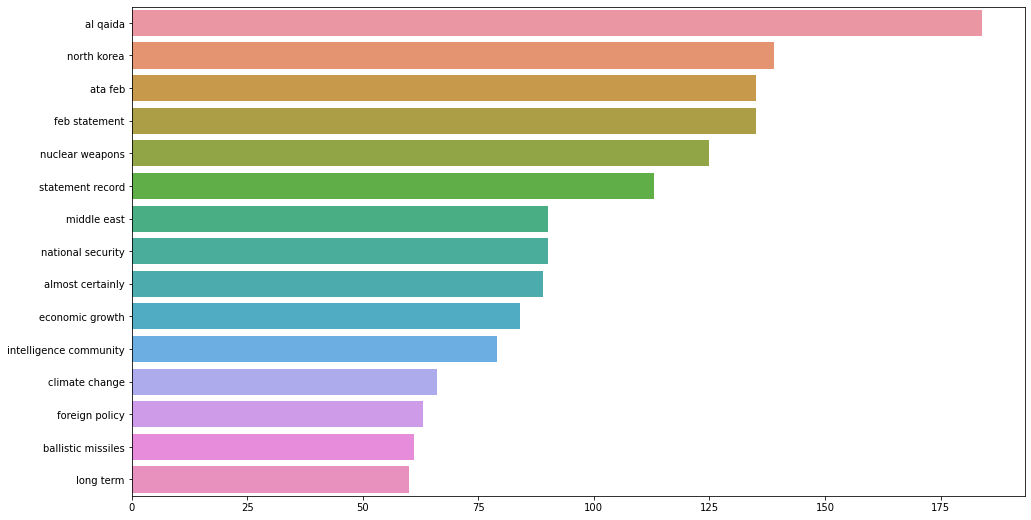

In [22]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text_b,15,2)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

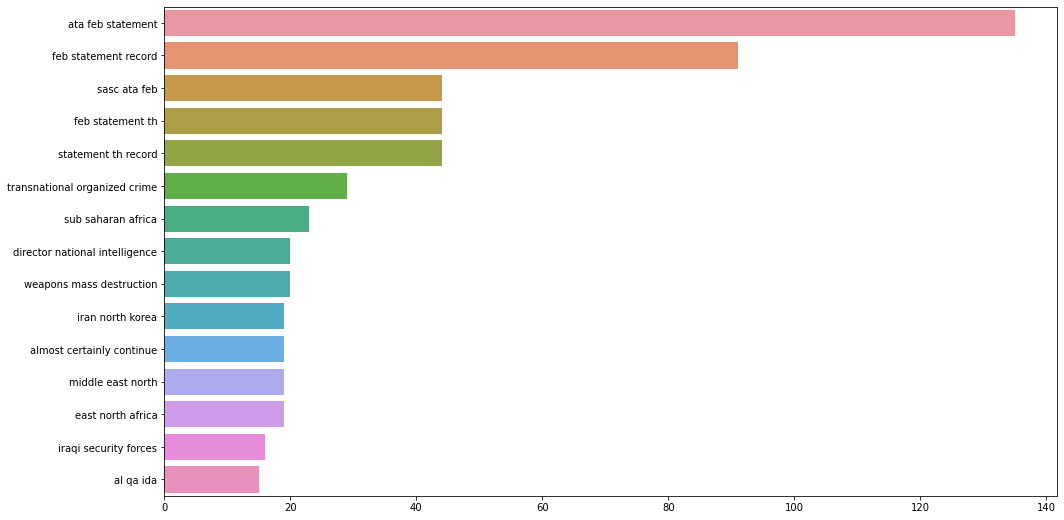

In [23]:
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(df.text_b,15,3)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [33]:
z = get_top_text_ngrams(a.pagina,25,3)
z

[('adversaries strategic competitors', 11),
 ('united states allies', 9),
 ('online influence operations', 6),
 ('influence operations election', 4),
 ('operations election interference', 4),
 ('cyber espionage attack', 4),
 ('threats us national', 3),
 ('us national security', 3),
 ('weapons mass destruction', 3),
 ('global economic growth', 3),
 ('espionage attack influence', 3),
 ('election interference section', 3),
 ('localized temporary disruptive', 3),
 ('target us allied', 3),
 ('us adversaries strategic', 3),
 ('past two years', 3),
 ('russian president vladimir', 3),
 ('president vladimir putin', 3),
 ('including united states', 3),
 ('violent ethno supremacist', 3),
 ('south china sea', 3),
 ('kim jong un', 3),
 ('saudi arabia uae', 3),
 ('mass destruction proliferation', 2),
 ('regional threats china', 2)]

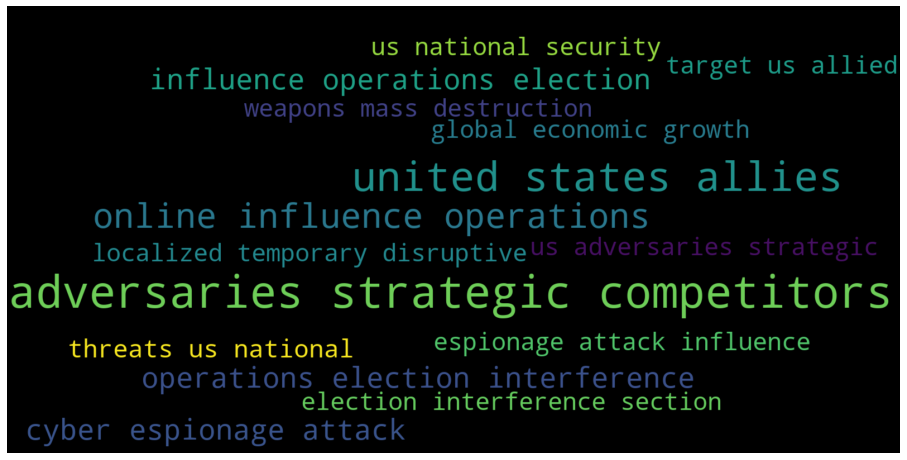

In [34]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(most_common_uni) # o 'a' veio de um counter
#wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(16,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('wordcloud.png', dpi=600)
plt.show()

In [8]:
#Para fazer tokenização
from nltk.tokenize import word_tokenize
a['token'] = a.pagina.map(word_tokenize)

In [9]:
a = pd.DataFrame(ab, columns = ['pagina'])

In [10]:
a

pagina
0        january    senate select committee on int...
1     statement for the record     worldwide threa...
2     contents  introduction                      ...
3      foreword  threats to us national security w...
4      global t hre ats  cyber  our adversaries  a...
5       russian intelligence and security services...
6      the growing availability and use of publicl...
7      weapons of  mass destruction an d prolifera...
8          promised not to make test use or  proli...
9      iran  we continue to assess that iran is no...
10      global jihadist groups in parts of africa ...
11     al  al  ing to encourage attacks against th...
12     lebanese hizballah  during  the next year h...
13     intelligence services and other entities su...
14     emerging and disrupt ive technologies and  ...
15     privacy challenges   furthermore  interacti...
16      global access to space services has  expan...
17     transnational organi zed crime  global tran...
18     transnational organized crime almost certai...
19     nationwide protests that forced the prime m...
20       reflecting tariffs sanctions on the russi...
21      human displacement  global displacement al...
22     environm ent and climate change  global env...
23     regional threats  china and russia  china a...
24      president xi removed one of the few remain...
25      beijing has stepped up efforts to reshape ...
26     north korea  nuclear ambitions  pyongyang h...
27     and rail lines establish new military param...
28      russia too has been increasing its diploma...
29     positions in syria    we assess  that  iran...
30      we assess that unprofessional interactions...
31     iraqi shia militants conducted several atta...
32      yemen  the huthi movement in yemen and the...
33      the humanitarian impacts of the conflict i...
34     south asia  the challenges facing south asi...
35     russia and eurasia  russian president vladi...
36     global ambitions   commercial and energy f ...
37      in   we assess  that  russia will continue...
38     national leaders  to contend with increased...
39     and its extremist allies present a  growing...
40     bolivia el salvador guatemala panama and ur...
41     venezuela  although  the regime of  nicolas...

In [11]:
a['token'] = a.pagina.map(word_tokenize)

In [12]:
a.head()

pagina  \
0       january    senate select committee on int...   
1    statement for the record     worldwide threa...   
2    contents  introduction                      ...   
3     foreword  threats to us national security w...   
4     global t hre ats  cyber  our adversaries  a...   

                                               token  
0  [january, senate, select, committee, on, intel...  
1  [statement, for, the, record, worldwide, threa...  
2  [contents, introduction, contents, foreword, g...  
3  [foreword, threats, to, us, national, security...  
4  [global, t, hre, ats, cyber, our, adversaries,...

In [13]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(a.token.tolist(), [])

word_list[:10]

['january',
 'senate',
 'select',
 'committee',
 'on',
 'intelligence',
 'statement',
 'for',
 'the',
 'record']

In [15]:
# Estas são as etapas para encontrar as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(710, 'and'),
 (537, 'the'),
 (494, 'to'),
 (310, 'in'),
 (289, 'of'),
 (152, 'a'),
 (131, 'will'),
 (116, 'us'),
 (102, 'as'),
 (99, 'that')]

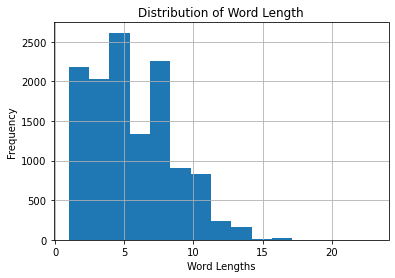

In [16]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

In [17]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words_en = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\galag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#Para aplicar essa limpeza ao corpus
clean_words = [word for word in word_list if not (word in stop_words_en)]

In [19]:
clean_words

['january',
 'senate',
 'select',
 'committee',
 'intelligence',
 'statement',
 'record',
 'worldwide',
 'threat',
 'assessment',
 'us',
 'intelligence',
 'community',
 'january',
 'introduction',
 'chairman',
 'burr',
 'vice',
 'chairman',
 'warner',
 'members',
 'committee',
 'thank',
 'invitation',
 'assessment',
 'threats',
 'us',
 'national',
 'security',
 'en',
 'men',
 'privileged',
 'honored',
 'lead',
 'intelligence',
 'community',
 'committed',
 'every',
 'day',
 'providing',
 'nuanced',
 'independent',
 'unvarnished',
 'intelligence',
 'policymakers',
 'warfighters',
 'domestic',
 'law',
 'enforcement',
 'personnel',
 'need',
 'protect',
 'american',
 'lives',
 'order',
 'topics',
 'presented',
 'statement',
 'necessarily',
 'indicate',
 'relative',
 'importance',
 'magnitude',
 'threat',
 'view',
 'intelligence',
 'community',
 'informa',
 'tion',
 'available',
 'jan',
 'uary',
 'used',
 'preparation',
 'assessment',
 'attention',
 'product',
 'contains',
 'us',
 'persons',

In [20]:
#Cria a função para retirar as stopwords
stop_lambda = lambda x: [y for y in x if y not in stop_words_en]
#aplica a função na coluna dos tokens
a['tokens_stop'] = a.token.apply(stop_lambda)
a.head()

pagina  \
0       january    senate select committee on int...   
1    statement for the record     worldwide threa...   
2    contents  introduction                      ...   
3     foreword  threats to us national security w...   
4     global t hre ats  cyber  our adversaries  a...   

                                               token  \
0  [january, senate, select, committee, on, intel...   
1  [statement, for, the, record, worldwide, threa...   
2  [contents, introduction, contents, foreword, g...   
3  [foreword, threats, to, us, national, security...   
4  [global, t, hre, ats, cyber, our, adversaries,...   

                                         tokens_stop  
0  [january, senate, select, committee, intellige...  
1  [statement, record, worldwide, threat, assessm...  
2  [contents, introduction, contents, foreword, g...  
3  [foreword, threats, us, national, security, ex...  
4  [global, hre, ats, cyber, adversaries, strateg...

In [21]:
word_list_clean = sum(a.tokens_stop.tolist(), [])

word_list_clean[:10]

['january',
 'senate',
 'select',
 'committee',
 'intelligence',
 'statement',
 'record',
 'worldwide',
 'threat',
 'assessment']

In [22]:
# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
b = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:10]

[(116, 'us'),
 (59, 'states'),
 (57, 'china'),
 (55, 'military'),
 (52, 'economic'),
 (49, 'united'),
 (48, 'continue'),
 (47, 'russia'),
 (45, 'influence'),
 (43, 'security')]

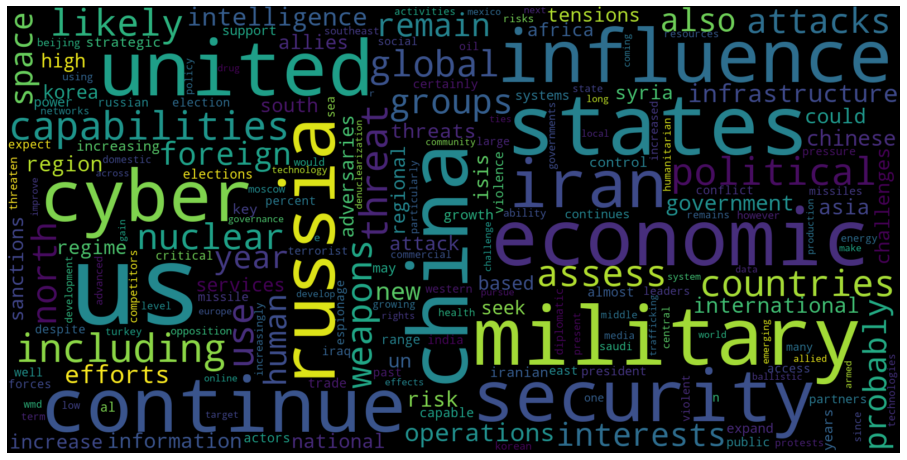

In [40]:
from wordcloud import WordCloud

text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(b) # o 'a' veio de um counter
#wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(16,13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png', dpi=600)
plt.show()

In [38]:
plt.savefig(wordcloud, 'wordcloud.png',dpi=600)

TypeError: savefig() takes 2 positional arguments but 3 were given

<Figure size 432x288 with 0 Axes>

In [24]:
b

Counter({'january': 4,
         'senate': 1,
         'select': 1,
         'committee': 4,
         'intelligence': 22,
         'statement': 3,
         'record': 4,
         'worldwide': 4,
         'threat': 33,
         'assessment': 3,
         'us': 116,
         'community': 7,
         'introduction': 2,
         'chairman': 2,
         'burr': 1,
         'vice': 1,
         'warner': 1,
         'members': 3,
         'thank': 1,
         'invitation': 1,
         'threats': 19,
         'national': 18,
         'security': 43,
         'en': 1,
         'men': 2,
         'privileged': 1,
         'honored': 1,
         'lead': 7,
         'committed': 2,
         'every': 1,
         'day': 1,
         'providing': 3,
         'nuanced': 1,
         'independent': 2,
         'unvarnished': 1,
         'policymakers': 1,
         'warfighters': 1,
         'domestic': 9,
         'law': 6,
         'enforcement': 4,
         'personnel': 3,
         'need': 4,
         'pr

In [25]:
from nltk import ngrams
a['bi_gram'] = ngrams(a.tokens_stop,2)

In [26]:
a.head()

pagina  \
0       january    senate select committee on int...   
1    statement for the record     worldwide threa...   
2    contents  introduction                      ...   
3     foreword  threats to us national security w...   
4     global t hre ats  cyber  our adversaries  a...   

                                               token  \
0  [january, senate, select, committee, on, intel...   
1  [statement, for, the, record, worldwide, threa...   
2  [contents, introduction, contents, foreword, g...   
3  [foreword, threats, to, us, national, security...   
4  [global, t, hre, ats, cyber, our, adversaries,...   

                                         tokens_stop  \
0  [january, senate, select, committee, intellige...   
1  [statement, record, worldwide, threat, assessm...   
2  [contents, introduction, contents, foreword, g...   
3  [foreword, threats, us, national, security, ex...   
4  [global, hre, ats, cyber, adversaries, strateg...   

                                           bi_gram  
0  <generator object ngrams at 0x0000022AB7FB6148>  
1  <generator object ngrams at 0x0000022AB7FB6148>  
2  <generator object ngrams at 0x0000022AB7FB6148>  
3  <generator object ngrams at 0x0000022AB7FB6148>  
4  <generator object ngrams at 0x0000022AB7FB6148>

In [27]:
list(ngrams(a.tokens_stop[0],2))

[('january', 'senate'),
 ('senate', 'select'),
 ('select', 'committee'),
 ('committee', 'intelligence')]

In [31]:
word_counts_clean[0]

(116, 'us')

In [32]:
f=open('f1.txt','w')
#s1='\n'.join(word_counts_clean)
f.write(word_counts_clean)
f.close()

TypeError: write() argument must be str, not list

In [35]:
palavras = pd.DataFrame(word_counts_clean, columns= ['frequencia', 'palavra'])

In [37]:
palavras.to_csv('palavras.csv', index = False)